## Observations and Insights 

In [34]:
 %matplotlib notebook

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
Mouse_metadata_path = "Resources/Mouse_metadata.csv"
Study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
Mouse_metadata = pd.read_csv(Mouse_metadata_path)
Study_results = pd.read_csv(Study_results_path)

# Combine the data into a single dataset

# Merge two dataframes using an inner join
mouse_study = pd.merge(Mouse_metadata, Study_results, how = "left", on="Mouse ID")
mouse_study



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
mouse_study.drop_duplicates(subset=['Timepoint'])


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [37]:
# Checking the number of mice.
mouse_study.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study = mouse_study.drop_duplicates(subset=['Timepoint', 'Mouse ID'])

In [39]:
mouse_study.drop_duplicates(subset=['Mouse ID'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [40]:
#summary statistics
counts = mouse_study['Drug Regimen'].value_counts()
print(counts)

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64


In [41]:
mouse_study.std()

Age_months             7.186737
Weight (g)             3.926776
Timepoint             14.084762
Tumor Volume (mm3)     8.904565
Metastatic Sites       1.138507
dtype: float64

In [42]:
mouse_study.var()

Age_months             51.649192
Weight (g)             15.419570
Timepoint             198.380534
Tumor Volume (mm3)     79.291277
Metastatic Sites        1.296199
dtype: float64

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study[["Drug Regimen","Tumor Volume (mm3)"]].describe()

,Tumor Volume (mm3)
count,1888.000000
mean,50.449276
std,8.904565
min,22.050126
25%,45.000000
50%,48.951421
75%,56.324075
max,78.567014


In [49]:
mouse_study.sem()

Age_months            0.165398
Weight (g)            0.090372
Timepoint             0.324152
Tumor Volume (mm3)    0.204933
Metastatic Sites      0.026202
dtype: float64

In [50]:
mouse_study.var()

Age_months             51.649192
Weight (g)             15.419570
Timepoint             198.380534
Tumor Volume (mm3)     79.291277
Metastatic Sites        1.296199
dtype: float64

In [51]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_study_drug = mouse_study.groupby(['Drug Regimen'])
mouse_study_drug


In [14]:
df1 = pd.DataFrame(mouse_study_drug)
df1

,0,1
0,Capomulin,Mouse ID Drug Regimen Sex Age_months...
1,Ceftamin,Mouse ID Drug Regimen Sex Age_months...
2,Infubinol,Mouse ID Drug Regimen Sex Age_months...
3,Ketapril,Mouse ID Drug Regimen Sex Age_months...
4,Naftisol,Mouse ID Drug Regimen Sex Age_months...
5,Placebo,Mouse ID Drug Regimen Sex Age_months...
6,Propriva,Mouse ID Drug Regimen Sex Age_months...
7,Ramicane,Mouse ID Drug Regimen Sex Age_months ...
8,Stelasyn,Mouse ID Drug Regimen Sex Age_months...
9,Zoniferol,Mouse ID Drug Regimen Sex Age_months...


In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = mouse_study_drug["Tumor Volume (mm3)"].describe()
print(tumor_mean)

# Using the aggregation method, produce the same summary statistics in a single line
df1 = mouse_study.agg(
       {"Tumor Volume (mm3)": ["min","max","median", "mean", "std", "sem", "var"],
       "Drug Regimen": ["min","max","median", "mean", "std", "sem", "var"],
     }
  )
df1

              count       mean       std        min        25%        50%  \
Drug Regimen                                                                
Capomulin     230.0  40.675741  4.994774  23.343598  37.685933  41.557809   
Ceftamin      178.0  52.591172  6.268188  45.000000  47.208427  51.776157   
Infubinol     178.0  52.884795  6.567243  36.321346  47.312353  51.820584   
Ketapril      188.0  55.235638  8.279709  45.000000  48.232987  53.698743   
Naftisol      186.0  54.331565  8.134708  45.000000  47.285874  52.509285   
Placebo       181.0  54.033581  7.821003  45.000000  47.459053  52.288934   
Propriva      156.0  52.393463  6.568014  45.000000  47.046068  50.909965   
Ramicane      228.0  40.216745  4.846308  22.050126  36.674635  40.673236   
Stelasyn      181.0  54.233149  7.710419  45.000000  48.047139  52.431737   
Zoniferol     182.0  53.236507  6.966589  45.000000  47.337876  51.818479   

                    75%        max  
Drug Regimen                        
C

,Tumor Volume (mm3),Drug Regimen
max,78.567014,Zoniferol
mean,50.449276,NaN
median,48.951421,NaN
min,22.050126,Capomulin
sem,0.204933,NaN
std,8.904565,NaN
var,79.291277,NaN


In [53]:
tumor_mean = mouse_study_drug["Tumor Volume (mm3)"].sem()
print(tumor_mean)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64


In [54]:
tumor_mean = mouse_study_drug["Tumor Volume (mm3)"].var()
print(tumor_mean)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64


In [55]:
tumor_mean = mouse_study_drug["Tumor Volume (mm3)"].describe()
print(tumor_mean)

              count       mean       std        min        25%        50%  \
Drug Regimen                                                                
Capomulin     230.0  40.675741  4.994774  23.343598  37.685933  41.557809   
Ceftamin      178.0  52.591172  6.268188  45.000000  47.208427  51.776157   
Infubinol     178.0  52.884795  6.567243  36.321346  47.312353  51.820584   
Ketapril      188.0  55.235638  8.279709  45.000000  48.232987  53.698743   
Naftisol      186.0  54.331565  8.134708  45.000000  47.285874  52.509285   
Placebo       181.0  54.033581  7.821003  45.000000  47.459053  52.288934   
Propriva      156.0  52.393463  6.568014  45.000000  47.046068  50.909965   
Ramicane      228.0  40.216745  4.846308  22.050126  36.674635  40.673236   
Stelasyn      181.0  54.233149  7.710419  45.000000  48.047139  52.431737   
Zoniferol     182.0  53.236507  6.966589  45.000000  47.337876  51.818479   

                    75%        max  
Drug Regimen                        
C

In [56]:
tumor_mean

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

In [57]:
tumor_mean = mouse_study.groupby('Drug Regimen')

mouse_tp = tumor_mean['Timepoint'].count()
mouse_tp

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<IPython.core.display.Javascript object>


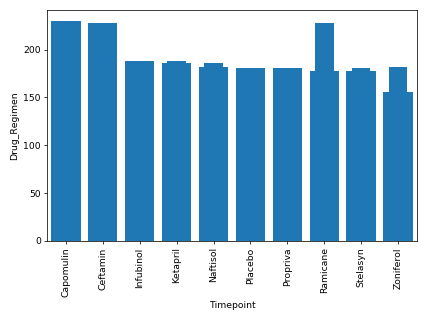

In [58]:
# Create a bar chart based off of the group series from before
mouse_tp = mouse_tp.plot(kind='bar')

# Set the xlabel and ylabel using class methods

mouse_tp.set_xlabel("Timepoint")
mouse_tp.set_ylabel("Drug_Regimen")


plt.show()
plt.tight_layout()

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

tumor_mean = mouse_study 
x_axis = np.arange(len(tumor_mean))
tick_locations = [value for value in x_axis]



In [60]:


plt.bar(counts.index.values, counts.values)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

In [24]:
print(x_axis)

[   0    1    2 ... 1885 1886 1887]


In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [29]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
